In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

# 1. openAPI 활용 및 json 데이터 읽기
## API : Application Programming Interface
## 서울시 데이터 포털에서 공공 API 활용하기
### 서울시 동별 인구통계
### http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

In [2]:
import requests

In [3]:
url = 'http://openapi.seoul.go.kr:8088'
api_key = 'sample' #개인인증키 발급받은 후, 입력
return_format = 'json'
service_id = 'octastatapi10043'
start_idx = 1
end_idx = 5     #인증키 받으면 더많이 접근 가능

request_url = '/'.join([url, api_key, return_format, service_id, str(start_idx), str(end_idx)])
print(request_url)
# 'http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/500/' 


http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/5


In [4]:
response = requests.get(request_url)

In [5]:
response.text
#JSON 형태

'{"octastatapi10043":{"list_total_count":450,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"GIGAN":"2016","JACHIGU":"합계","DONG":"합계","SEDAE":"4189839","GYE_1":"10204057","NAMJA_1":"5007379","YEOJA_1":"5196678","GYE_2":"9930616","NAMJA_2":"4876789","YEOJA_2":"5053827","GYE_3":"273441","NAMJA_3":"130590","YEOJA_3":"142851","SEDAEDANGINGU":"2.37","N_65SEISANGGORYEONGJA":"1300877"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"소계","SEDAE":"72118","GYE_1":"161922","NAMJA_1":"79322","YEOJA_1":"82600","GYE_2":"152737","NAMJA_2":"75201","YEOJA_2":"77536","GYE_3":"9185","NAMJA_3":"4121","YEOJA_3":"5064","SEDAEDANGINGU":"2.12","N_65SEISANGGORYEONGJA":"25091"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"사직동","SEDAE":"4399","GYE_1":"10013","NAMJA_1":"4605","YEOJA_1":"5408","GYE_2":"9695","NAMJA_2":"4429","YEOJA_2":"5266","GYE_3":"318","NAMJA_3":"176","YEOJA_3":"142","SEDAEDANGINGU":"2.20","N_65SEISANGGORYEONGJA":"1707"},{"GIGAN":"2016","JACHIGU":"종로구","DONG":"삼청동","SEDAE":"1403","GYE_1":"3118"

### json (Java Script Object Notation)

### 1) json 설명: https://ko.wikipedia.org/wiki/JSON
### 2) json online editor: https://jsoneditoronline.org/

In [6]:
sample = ' { \
    "이름": "김지아", \
    "나이": 25, \
    "성별": "여", \
    "주소": "서울특별시 양천구 목동",\
    "특기": ["농구", "도술"],\
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},\
    "회사": "경기 수원시 팔달구 우만동"\
 }'

In [7]:
import json

In [8]:
jsonsample = json.loads(sample)

In [9]:
# json의 특정 항목에 접근
jsonsample['가족관계']['아버지']

'홍판서'

In [10]:
#API 결과를 json 포맷으로 변환
jsondata = response.json()

In [11]:
jsondata = jsondata['octastatapi10043']['row']
동별인구통계 = DataFrame(jsondata)
동별인구통계

,DONG,GIGAN,GYE_1,GYE_2,GYE_3,JACHIGU,NAMJA_1,NAMJA_2,NAMJA_3,N_65SEISANGGORYEONGJA,SEDAE,SEDAEDANGINGU,YEOJA_1,YEOJA_2,YEOJA_3
0,합계,2016,10204057,9930616,273441,합계,5007379,4876789,130590,1300877,4189839,2.37,5196678,5053827,142851
1,소계,2016,161922,152737,9185,종로구,79322,75201,4121,25091,72118,2.12,82600,77536,5064
2,사직동,2016,10013,9695,318,종로구,4605,4429,176,1707,4399,2.20,5408,5266,142
3,삼청동,2016,3118,2903,215,종로구,1491,1377,114,624,1403,2.07,1627,1526,101
4,부암동,2016,11044,10616,428,종로구,5349,5160,189,1723,4371,2.43,5695,5456,239


# 2. folium 을 활용한 지도 시각화

In [12]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

In [13]:
map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15) #zoon_start 클수록 상세함
map1
# 서울시청을 지도의 중심으로, 지도를 그려줌. 
# zoom_start는 지도를 그릴 때 얼마나 zoom 해서 보여줄 지를 결정.  값이 클수록, zoom in

In [21]:
# Marker 추가하기 (지도에 지점 추가하기)
folium.Marker([37.56, 126.97], popup = '테스트지점').add_to(map1) #마커가 추가됨

In [22]:
map1

In [16]:
측정위치 = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                      skiprows = [0,1,3])
측정위치.head()

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3.0,8.0,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2015,본조사
1,01-004,GS25,11010.0,1101055.0,94,2,세검정로 230,3.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2015,본조사
2,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4.0,5.0,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2015,본조사
3,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4.0,4.0,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2015,본조사
4,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2.0,7.0,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2015,본조사


In [17]:
측정위치50 = 측정위치[['조사지점명', 'X좌표', 'Y좌표']].iloc[:50]
측정위치50
# 50개의 측정 위치에 대해 필요한 정보만 저장

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
5,24시 동대문 설렁탕.,200966.43423,452483.73642
6,서울전문학교.,201686.66781,452747.41594
7,서울 종묘농약,200231.75517,452355.91115
8,서울 종묘농약,200231.75517,452355.91115
9,삼성카드빌딩,199935.57893,452934.78947


In [23]:
# 위치 정보 변환을 위한 라이브러리 설치
# pip install pyproj
#conda install pyproj
from pyproj import Proj, transform

In [24]:
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')  #위치 인코딩 방식을 5181에서 4326으로 바꾸겠다
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]

In [28]:
#측정위치50에 위도와 경도 정보를 추가
측정위치50['위경도'] = 측정위치50.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1) #lambda는 row하나씩 가져온다.(익명함수) :앞이 input 뒤가 output
측정위치50.head(3)

<generator object DataFrame.iterrows at 0x000001F2EF188E08>

In [33]:
#측정위치 50개를 지도에 표시
for row in 측정위치50.iterrows():
    folium.Marker(row[1]['위경도'], popup = row[1]['조사지점명']).add_to(map1)

In [27]:
map1

# 3. 서울시 유동인구 분석

## 데이터 적재

In [34]:
유동인구 = pd.read_excel('data/서울시유동인구/0_유동인구_유동인구기본_2015.xlsx', 
                      skiprows = [0,1,3])

In [35]:
data = pd.read_excel('data/서울시유동인구/4_유동인구_조사지점정보_2015.xlsx', 
                     sheetname = None, skiprows = [0,1,3]) #sheet가 여러개니까 dict형태임

In [36]:
data.keys()

odict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [37]:
조사지점 = data.get('유동인구_조사지점정보_2015')
구코드 = data.get('GU_CD')
동코드 = data.get('DONG_CD')
집계구코드 = data.get('SM_GU_CD')

In [39]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015
1,2,30-001,지하철,금,08시-09시,112.5,2015
2,3,30-001,지하철,금,09시-10시,108.0,2015
3,4,30-001,지하철,금,10시-11시,94.5,2015
4,5,30-001,지하철,금,11시-12시,87.0,2015


In [41]:
집계구코드.head(5)

,집계구코드,구코드,동코드,구명,동명,연도,집계구명칭
0,1104070010005,1104,1104070,성동구,용답동,2013,영해약국
1,1104070010004,1104,1104070,성동구,용답동,2013,은광교회
2,1104070010007,1104,1104070,성동구,용답동,2013,하나빌라
3,1104070010001,1104,1104070,성동구,용답동,2013,나라글짓기학원
4,1104070010003,1104,1104070,성동구,용답동,2013,국민은행


In [42]:
유동인구 = pd.merge(유동인구, 조사지점[['조사지점코드', '조사지점명', '구코드', '동코드', 'X좌표', 'Y좌표', '집계구코드']])

In [43]:
유동인구 = pd.merge(유동인구, 구코드[['구코드', '구명']])

In [44]:
유동인구 = pd.merge(유동인구, 동코드[['동코드', '동명']])

In [45]:
유동인구

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
5,3072,01-003,본조사,금,12시-13시,48.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
6,3073,01-003,본조사,금,13시-14시,30.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
7,3074,01-003,본조사,금,14시-15시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
8,3075,01-003,본조사,금,15시-16시,30.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
9,3076,01-003,본조사,금,16시-17시,39.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동


## 미션 1. 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. (e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [ ]:
유동인구.pivot_table(index = ['조사요일', '시간대'], values = '유동인구수', aggfunc = 'sum') \
                    .sort_values(by = '유동인구수', ascending = False).head(10)

## 미션 2	. 서울시 각 구별 전체 유동인구 분석

In [46]:
유동인구.head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
1,3068,01-003,본조사,금,08시-09시,36.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
2,3069,01-003,본조사,금,09시-10시,27.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
3,3070,01-003,본조사,금,10시-11시,51.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동
4,3071,01-003,본조사,금,11시-12시,36.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [47]:
구별유동인구 = 유동인구.pivot_table(index = '구명', values = '유동인구수', aggfunc = 'sum')

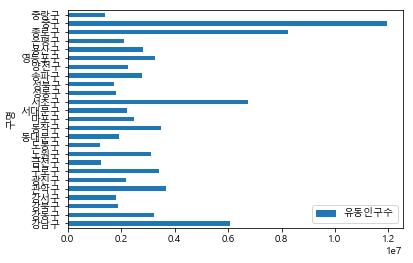

In [48]:
구별유동인구.plot(kind = 'barh')

## 미션 3. 서울시 각 구별로 출퇴근 시간의 유동인구 분석 (출퇴근 시간은 6시-10시, 18시-21시로 가정함)


In [ ]:
유동인구.head(1)

In [ ]:
구별시간대별유동인구 = 유동인구.pivot_table(index = ['구명', '시간대'], values = '유동인구수', aggfunc = 'sum')

In [ ]:
출퇴근시간대 = list(np.unique(유동인구['시간대'])[0:3]) + list(np.unique(유동인구['시간대'])[-3:])

In [ ]:
출퇴근시간대구별유동인구 = 구별시간대별유동인구[구별시간대별유동인구.index.get_level_values('시간대').isin(출퇴근시간대)]

In [ ]:
출퇴근시간대구별유동인구 = 출퇴근시간대구별유동인구.unstack()

In [ ]:
출퇴근시간대구별유동인구

In [ ]:
출퇴근시간대구별유동인구.plot(kind = 'barh', stacked = True, figsize = (10,10))

## 미션 4. 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [49]:
요일별구별유동인구 = 유동인구.pivot_table(index = '구명', columns = '조사요일', values = '유동인구수', aggfunc = 'sum')
요일별구별유동인구

조사요일,금,목,수,월,토,화
구명,,,,,,
강남구,1332957.0,457392.0,1263249.0,1203096.0,1041297.0,771612.0
강동구,667851.0,233298.0,638115.0,621825.0,684879.0,382038.0
강북구,383547.0,123090.0,375171.0,371385.0,390237.0,240585.0
강서구,371961.0,131874.0,359754.0,361914.0,343626.0,218241.0
관악구,774048.0,275886.0,750717.0,740619.0,677814.0,460836.0
광진구,442401.0,137526.0,426276.0,428118.0,465678.0,294864.0
구로구,689622.0,216120.0,687081.0,681717.0,669030.0,466620.0
금천구,268839.0,91344.0,272085.0,270630.0,172191.0,187053.0
노원구,651681.0,186870.0,625392.0,615462.0,631989.0,419322.0


In [56]:
요일별구별유동인구['주중'] = (요일별구별유동인구['월'] + 요일별구별유동인구['화'] + 
                         요일별구별유동인구['수']+요일별구별유동인구['목']+요일별구별유동인구['금'])/5

KeyError: "['월' '화' '수' '목' '금'] not in index"

In [51]:
요일별구별유동인구['주말'] = 요일별구별유동인구['토']

In [52]:
요일별구별유동인구['주중주말편차'] = (요일별구별유동인구['주중']-요일별구별유동인구['주말']).abs()

In [53]:
요일별구별유동인구 = 요일별구별유동인구[['주중','주말', '주중주말편차']]

In [54]:
요일별구별유동인구.sort_values(by = '주중주말편차', ascending= False)

조사요일,주중,주말,주중주말편차
구명,,,
중구,1833919.8,2761104.0,927184.2
종로구,1270663.8,1871346.0,600682.2
서초구,1077611.4,1374945.0,297333.6
송파구,431248.2,609228.0,177979.8
강동구,508625.4,684879.0,176253.6
용산구,443713.2,605682.0,161968.8
노원구,499745.4,631989.0,132243.6
구로구,548232.0,669030.0,120798.0
광진구,345837.0,465678.0,119841.0


In [ ]:
요일별구별유동인구.plot(kind = 'barh', figsize = (10,10))

## 미션 5. 유동인구의 수와 보행환경 정보를 분석하여, 보행 환경 개선이 시급한 곳 10군데를 선정. (보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )


In [58]:
data = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx', skiprows = [0,1,3])
data.head(30)

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015
5,6,01-003,1016,금,여자,NaN,오전7시30분~11시,65세이상,종로구,"그냥 걸으려고(운동,산책,기분전환등)",매일,NaN,NaN,약간만족,NaN,2015
6,7,01-003,1016,금,여자,NaN,오전7시30분~11시,50-54세,종로구,누군가를데리러(또는데려다주러),주3~5회,NaN,NaN,약간만족,(전업)주부,2015
7,8,01-003,1016,금,여자,NaN,오전7시30분~11시,60-64세,종로구,출근,주3~5회,NaN,NaN,약간만족,일용/작업직,2015
8,9,01-003,1016,금,여자,NaN,오전7시30분~11시,65세이상,종로구,출근,주3~5회,NaN,NaN,약간만족,일용/작업직,2015
9,10,01-003,1016,금,여자,NaN,오전7시30분~11시,40-44세,종로구,누군가를데리러(또는데려다주러),주3~5회,NaN,NaN,약간만족,(전업)주부,2015


In [59]:
def 보행환경점수(myscore):
    if myscore == '매우불만족':
        return 0
    elif myscore == '약간불만족':
        return 1
    elif myscore == '보통':
        return 2
    elif myscore == '약간만족':
        return 3
    elif myscore == '매우만족':
        return 4

In [61]:
data['보행만족도'] = data.apply(lambda row : 보행환경점수(row['보행환경']), axis = 1)

In [62]:
data.head()

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도,보행만족도
0,1,01-003,1016,금,여자,NaN,오전11시~오후2시,50-54세,종로구,업무관련,주1~2회,NaN,NaN,약간만족,전문/자유직,2015,3
1,2,01-003,1016,금,남자,NaN,오전11시~오후2시,60-64세,성북구,업무관련,주3~5회,NaN,NaN,매우만족,일용/작업직,2015,4
2,3,01-003,1016,금,남자,NaN,오전11시~오후2시,65세이상,종로구,업무관련,주3~5회,NaN,NaN,약간만족,일용/작업직,2015,3
3,4,01-003,1016,금,남자,NaN,오전7시30분~11시,45-49세,서대문구,출근,매일,NaN,NaN,약간만족,사무/기술직,2015,3
4,5,01-003,1016,금,남자,NaN,오전7시30분~11시,35-39세,도봉구,출근,매일,NaN,NaN,매우만족,사무/기술직,2015,4


In [ ]:
유동인구_속성조사 = pd.read_excel('data/서울시유동인구/2_유동인구_속성조사_2015.xlsx', 
                      skiprows = [0,1,3])

In [ ]:
def 보행환경(만족도):
    if 만족도 == '매우만족':
        return 5
    elif 만족도 == '약간만족':
        return 4
    elif 만족도 == '보통':
        return 3
    elif 만족도 == '약간불만족':
        return 2
    elif 만족도 == '매우불만족':
        return 1
    else:
        return 0

In [ ]:
유동인구_속성조사['보행점수'] = 유동인구_속성조사.보행환경.apply(보행환경)

In [ ]:
지점별유동인구 = 유동인구.pivot_table(index = '조사지점코드', values = '유동인구수', aggfunc = 'sum')

In [ ]:
지점별보행점수 = 유동인구_속성조사.pivot_table(index = '조사지점코드', values = '보행점수', aggfunc = 'mean')

In [ ]:
유동인구.head(1)

In [ ]:
지점별 = pd.concat([지점별유동인구, 지점별보행점수], axis = 1)
지점별

In [ ]:
지점별 = 지점별.join(조사지점.set_index('조사지점코드')['조사지점명'])

In [ ]:
지점별.sort_values(by = '보행점수')